# Fragrance cluster analysis

# Table of contents

1. Data exploration
2. Choosing the right number of clusters <br>
   2.1. Elbow method <br>
   2.2. Silhouette coefficient <br>
3. Four fragrance clusters
4. Six fragrance clusters
5. Seven fragrance clusters
6. Eight fragrance clusters
7. Hierarchical clustering

## Objective

Fragrances will be grouped into clusters - objects in the same cluster should be more similar to each other than to objects in other clusters.

We will define the main scent family for each fragrance. To do this, different approaches based on business rules will be used.

## 1. Data exploration

In [1]:
# import Python libraries
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# open the csv file
df = pd.read_csv('perfume.csv')
pd.options.display.max_columns = None
df.head()

,brand,title,date,accords,rating_score,votes,longevity_poor,longevity_weak,longevity_moderate,longevity_long,longevity_very_long,sillage_soft,sillage_moderate,sillage_heavy,sillage_enormous,clslove,clslike,clsdislike,clswinter,clsspring,clssummer,clsautumn,clscold,clshot,clsday,clsnight,clslove_female25under,clslove_male25under,clslove_female25older,clslove_male25older,clslike_female25under,clslike_male25under,clslike_female25older,clslike_male25older,clsdislike_female25under,clsdislike_male25under,clsdislike_female25older,clsdislike_male25older,clswinter_female25under,clswinter_male25under,clswinter_female25older,clswinter_male25older,clsspring_female25under,clsspring_male25under,clsspring_female25older,clsspring_male25older,clssummer_female25under,clssummer_male25under,clssummer_female25older,clssummer_male25older,clsautumn_female25under,clsautumn_male25under,clsautumn_female25older,clsautumn_male25older,clsday_female25under,clsday_male25under,clsday_female25older,clsday_male25older,clsnight_female25under,clsnight_male25under,clsnight_female25older,clsnight_male25older,Ihaveit,Ihadit,Iwantit,notes_1,notes_2,notes_3,notes_4,notes_5,notes_6,notes_7,notes_8,notes_9,notes_10,notes_11,notes_12,notes_13,notes_14,notes_15,notes_16,notes_17,notes_18,notes_19,notes_20,gender
0,The-Spirit-of-Dubai,Aamal The Spirit of Dubai for women and men,2017,"woody,earthy,animalic,amber,musky,balsamic",5.0,3,0,0,0,0,3,0,1,0,3,100,1,1,50,50,50,50,0,0,50,50,1,1,1,100,1,1,1,1,1,1,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,1,1,3.0,0.0,0.0,Top1Bulgarian Rose,Top2Bergamot,Top3Fruits,Top4Agarwood (Oud),Middle0Sandalwood,Middle1Agarwood (Oud),Middle2Cypriol Oil or Nagarmotha,Middle3Benzoin,Base0Amber,Base1Castoreum,Base2Civet,Base3Moss,Base4Agarwood (Oud),Base5Indian Oud,NaN,NaN,NaN,NaN,NaN,NaN,women
1,Ajmal,Aatifa Ajmal for women and men,2014,"fresh spicy,woody,musky,rose,amber",4.2,10,1,0,0,0,5,0,0,3,3,100,80,20,100,60,60,60,0,0,80,80,1,1,60,40,1,1,80,1,1,1,20,1,1,1,80,20,1,1,40,20,1,1,60,1,1,1,60,1,1,1,60,20,1,1,60,20,8.0,0.0,0.0,Top1Rose,Top2Cumin,Middle0Amber,Middle1Woody Notes,Base0Musk,Base1Amber,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,women
2,Al-Jazeera-Perfumes,AA Al-Jazeera Perfumes for women and men,0,"rose,woody,musky,oud,fruity",0.0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,3.0,Top1Rose,Top2Sandalwood,Top3Apple,Top4Agarwood (Oud),Middle0nan,Base0nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,women
3,Art-of-Scent-Swiss-Perfumes,aarewasser Art of Scent - Swiss Perfumes for w...,2010,"white floral,green,ozonic,fresh,animalic",0.0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,100,100,100,0,0,100,100,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,0.0,0.0,1.0,Top1Green Tea,Top2White Flowers,Top3Ozonic notes,Middle0nan,Base0nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,women
4,Hamidi-Oud-Perfumes,Aaliyah Hamidi Oud & Perfumes for women and men,0,"woody,warm spicy,amber,balsamic,musky",0.0,2,0,0,0,0,2,0,2,0,0,1,1,1,100,100,100,100,0,0,100,100,1,1,1,1,1,1,1,1,1,1,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,1,1,0.0,0.0,2.0,Top1Amber,Top2Sandalwood,Top3Floral Notes,Top4Vetiver,Top5Saffron,Middle0nan,Base0nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,women


In [3]:
# display all columns
my_list = list(df)
my_list

['brand',
 'title',
 'date',
 'accords',
 'rating_score',
 'votes',
 'longevity_poor',
 'longevity_weak',
 'longevity_moderate',
 'longevity_long',
 'longevity_very_long',
 'sillage_soft',
 'sillage_moderate',
 'sillage_heavy',
 'sillage_enormous',
 'clslove',
 'clslike',
 'clsdislike',
 'clswinter',
 'clsspring',
 'clssummer',
 'clsautumn',
 'clscold',
 'clshot',
 'clsday',
 'clsnight',
 'clslove_female25under',
 'clslove_male25under',
 'clslove_female25older',
 'clslove_male25older',
 'clslike_female25under',
 'clslike_male25under',
 'clslike_female25older',
 'clslike_male25older',
 'clsdislike_female25under',
 'clsdislike_male25under',
 'clsdislike_female25older',
 'clsdislike_male25older',
 'clswinter_female25under',
 'clswinter_male25under',
 'clswinter_female25older',
 'clswinter_male25older',
 'clsspring_female25under',
 'clsspring_male25under',
 'clsspring_female25older',
 'clsspring_male25older',
 'clssummer_female25under',
 'clssummer_male25under',
 'clssummer_female25older',

In [4]:
# select columns for further analysis
df1 = df[['brand', 'title', 'date', 'gender', 'votes', 'rating_score', 'accords']]
df1.head()

,brand,title,date,gender,votes,rating_score,accords
0,The-Spirit-of-Dubai,Aamal The Spirit of Dubai for women and men,2017,women,3,5.0,"woody,earthy,animalic,amber,musky,balsamic"
1,Ajmal,Aatifa Ajmal for women and men,2014,women,10,4.2,"fresh spicy,woody,musky,rose,amber"
2,Al-Jazeera-Perfumes,AA Al-Jazeera Perfumes for women and men,0,women,0,0.0,"rose,woody,musky,oud,fruity"
3,Art-of-Scent-Swiss-Perfumes,aarewasser Art of Scent - Swiss Perfumes for w...,2010,women,1,0.0,"white floral,green,ozonic,fresh,animalic"
4,Hamidi-Oud-Perfumes,Aaliyah Hamidi Oud & Perfumes for women and men,0,women,2,0.0,"woody,warm spicy,amber,balsamic,musky"


In [5]:
# basic characteristics
df1.describe()

,date,votes,rating_score
count,51212.000000,51212.000000,51212.000000
mean,1526.492775,86.440522,3.192377
std,867.219020,362.674407,1.630846
min,0.000000,0.000000,0.000000
25%,1900.000000,2.000000,3.000000
50%,2009.000000,9.000000,3.860000
75%,2015.000000,42.000000,4.200000
max,9459.000000,11188.000000,5.000000


In [6]:
# find length of longest string in Pandas dataframe
df1['accords'].str.len().max()
# set column width in dataframe
pd.options.display.max_colwidth = 76

In [7]:
# show the first 5 rows
df1.head()

,brand,title,date,gender,votes,rating_score,accords
0,The-Spirit-of-Dubai,Aamal The Spirit of Dubai for women and men,2017,women,3,5.0,"woody,earthy,animalic,amber,musky,balsamic"
1,Ajmal,Aatifa Ajmal for women and men,2014,women,10,4.2,"fresh spicy,woody,musky,rose,amber"
2,Al-Jazeera-Perfumes,AA Al-Jazeera Perfumes for women and men,0,women,0,0.0,"rose,woody,musky,oud,fruity"
3,Art-of-Scent-Swiss-Perfumes,aarewasser Art of Scent - Swiss Perfumes for women and men,2010,women,1,0.0,"white floral,green,ozonic,fresh,animalic"
4,Hamidi-Oud-Perfumes,Aaliyah Hamidi Oud & Perfumes for women and men,0,women,2,0.0,"woody,warm spicy,amber,balsamic,musky"


In [8]:
# show the last 5 rows
df1.tail()

,brand,title,date,gender,votes,rating_score,accords
51207,Maitre-Parfumeur-et-Gantier,Oud Extravagant Maitre Parfumeur et Gantier for women and men,2018,women,5,3.67,"balsamic,oud,aromatic,fresh spicy,vanilla,smoky,Pictures"
51208,Como-Lake,Silenzio Como Lake for women and men,2018,women,1,0.00,"woody,musky,aromatic,amber,white floral,citrus,Pictures"
51209,Battistoni,Marte Red Planet Battistoni for men,0,NaN,0,0.00,"aromatic,green,citrus,woody,fresh spicy,amber,Pictures"
51210,12-Parfumeurs-Francais,Versailles 12 Parfumeurs Francais for women and men,2015,women,1,0.00,"warm spicy,woody,citrus,fruity,sweet"
51211,OPSObjects,Ops! Love OPSObjects for women,2015,women,1,0.00,"floral,citrus,fresh,aromatic,patchouli,musky,Pictures"


In [9]:
# group by gender
df1['gender'].value_counts()

women     39761
man         850
unisex      122
Name: gender, dtype: int64

In [10]:
# count all rows
df1['gender'].count()

40733

In [11]:
# group by rating_score
df1['rating_score'].value_counts().head(20)

0.00    9307
4.00    4820
5.00    2819
4.50    1696
3.00    1047
4.33     893
1.00     784
3.67     671
4.67     660
3.50     578
4.25     562
3.33     547
3.75     529
2.50     501
4.20     463
4.17     393
3.80     390
3.83     383
3.88     349
3.86     340
Name: rating_score, dtype: int64

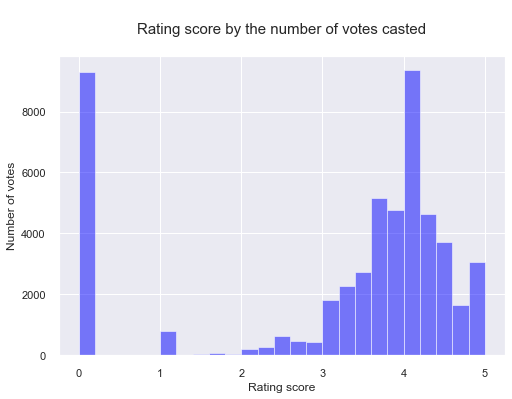

In [12]:
# plot a histogram with the rating score in bins
sc = df1['rating_score']
plt.hist(sc, 25, facecolor='blue', alpha=0.5)
plt.title('\nRating score by the number of votes casted\n', fontsize=15)
plt.xlabel('Rating score')
plt.ylabel('Number of votes')
plt.show()

In [13]:
# group by date
df1['date'].value_counts().head(20)

0       12237
2017     3243
2016     3186
2015     3144
2018     3098
2014     2718
2013     2307
2012     2220
2010     1945
2011     1872
2019     1659
2008     1423
2009     1372
2007     1133
2000     1048
2006      908
2005      675
2004      550
2003      513
2002      365
Name: date, dtype: int64

In [14]:
# display top 10 brands
df1['brand'].value_counts().head(10)

Avon                 786
Guerlain             395
Zara                 331
Demeter-Fragrance    329
Victoria-s-Secret    314
O-Botic-rio          297
Oriflame             290
Natura               275
DSH-Perfumes         264
Ajmal                243
Name: brand, dtype: int64

In [15]:
# display the most popular fragrances
df1.sort_values('votes', ascending=False).head(20)

,brand,title,date,gender,votes,rating_score,accords
9762,Mugler,Angel Mugler for women,1992,women,11188,3.15,"sweet,patchouli,warm spicy,fruity,caramel,cacao,Videos,Pictures"
8141,Mugler,Alien Mugler for women,2005,women,10435,3.81,"white floral,amber,woody,animalic,balsamic,Videos,Pictures"
26082,Chanel,Coco Mademoiselle Chanel for women,2001,women,10349,4.08,"citrus,patchouli,white floral,sweet,rose,balsamic,Videos,Pictures"
20025,Dolce-Gabbana,Light Blue Dolce&Gabbana for women,2001,women,10008,3.64,"citrus,woody,green,fresh,fruity,Videos,Pictures"
43773,Christian-Dior,Hypnotic Poison Christian Dior for women,1998,women,9771,3.95,"vanilla,almond,sweet,nutty,fruity,Videos,Pictures"
37519,Yves-Saint-Laurent,La Nuit de l'Homme Yves Saint Laurent for men,2009,NaN,8738,4.45,"aromatic,warm spicy,fresh spicy,woody,floral,Videos,Pictures"
3108,Christian-Dior,J'adore Christian Dior for women,1999,women,8689,3.64,"floral,fruity,white floral,sweet,aquatic,Videos,Pictures"
4939,Viktor-Rolf,Flowerbomb Viktor&Rolf for women,2005,women,8573,3.72,"floral,patchouli,white floral,green,citrus,Videos,Pictures"
37269,Calvin-Klein,Euphoria Calvin Klein for women,2005,women,8161,3.68,"woody,floral,powdery,sweet,amber,fruity,Videos,Pictures"
15091,Tom-Ford,Black Orchid Tom Ford for women,1,women,8128,3.77,"warm spicy,sweet,earthy,balsamic,cacao,Pictures"


### Accord of a perfume

An accord is a combination of several notes (e.g. rose, chypre, amber). 

Fragrances can be classified into one various types, although there is a lot of overlap. Most scents contain notes from more than one family. 

The most dominant notes in the fragrance determines the scent category.

In [16]:
# split accords column into separate columns
df2 = df1['accords'].str.split(",", n = 6, expand = True)
df2.tail()

,0,1,2,3,4,5,6
51207,balsamic,oud,aromatic,fresh spicy,vanilla,smoky,Pictures
51208,woody,musky,aromatic,amber,white floral,citrus,Pictures
51209,aromatic,green,citrus,woody,fresh spicy,amber,Pictures
51210,warm spicy,woody,citrus,fruity,sweet,None,None
51211,floral,citrus,fresh,aromatic,patchouli,musky,Pictures


In [17]:
# create new accords_ clean column by extracting top five accords
df2['accords_'] = df2[df2.columns[0:5]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
df2.tail()

,0,1,2,3,4,5,6,accords_
51207,balsamic,oud,aromatic,fresh spicy,vanilla,smoky,Pictures,"balsamic,oud,aromatic,fresh spicy,vanilla"
51208,woody,musky,aromatic,amber,white floral,citrus,Pictures,"woody,musky,aromatic,amber,white floral"
51209,aromatic,green,citrus,woody,fresh spicy,amber,Pictures,"aromatic,green,citrus,woody,fresh spicy"
51210,warm spicy,woody,citrus,fruity,sweet,None,None,"warm spicy,woody,citrus,fruity,sweet"
51211,floral,citrus,fresh,aromatic,patchouli,musky,Pictures,"floral,citrus,fresh,aromatic,patchouli"


In [18]:
# merge two dataframes by index
result = df1.join(df2)
result = result[['brand', 'title', 'date', 'gender','rating_score','votes','accords_']]
result.tail()

,brand,title,date,gender,rating_score,votes,accords_
51207,Maitre-Parfumeur-et-Gantier,Oud Extravagant Maitre Parfumeur et Gantier for women and men,2018,women,3.67,5,"balsamic,oud,aromatic,fresh spicy,vanilla"
51208,Como-Lake,Silenzio Como Lake for women and men,2018,women,0.00,1,"woody,musky,aromatic,amber,white floral"
51209,Battistoni,Marte Red Planet Battistoni for men,0,NaN,0.00,0,"aromatic,green,citrus,woody,fresh spicy"
51210,12-Parfumeurs-Francais,Versailles 12 Parfumeurs Francais for women and men,2015,women,0.00,1,"warm spicy,woody,citrus,fruity,sweet"
51211,OPSObjects,Ops! Love OPSObjects for women,2015,women,0.00,1,"floral,citrus,fresh,aromatic,patchouli"


## 2. Choosing the right number of clusters

In [19]:
# vectorize the text - convert the string to numeric
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(result['accords_'].values.astype('U'))

### 2.1. Elbow method

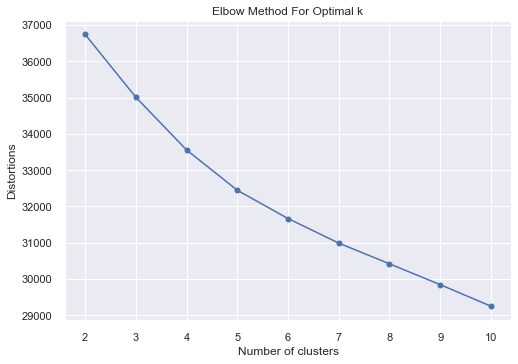

In [20]:
# elbow method for K means
# the chart is quite smooth, it does not have a distinct elbow
distortions = []

for i in range(2,11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(2,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortions')
plt.title('Elbow Method For Optimal k')
plt.show()

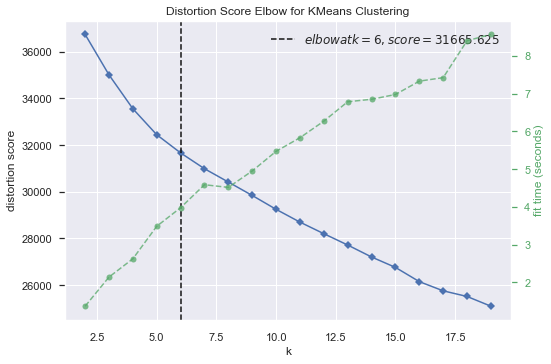

In [21]:
# elbow method for K means
model = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
visualizer = KElbowVisualizer(model, k=(2,20), timings= True)
visualizer.fit(X)         
visualizer.poof(); 

### 2.2. Silhouette coefficient

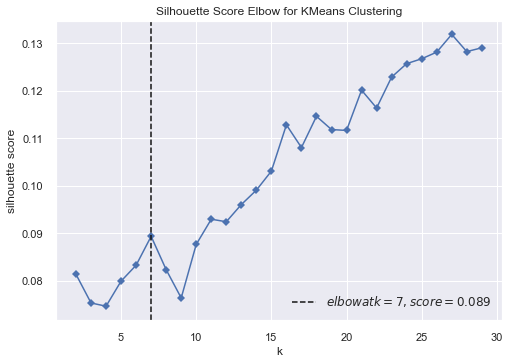

In [22]:
# silhouette score for K means
# k=7 is a local optima, whereas k=16 should be chosen for the number of clusters
model = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= False)
visualizer.fit(X)      
visualizer.poof();  

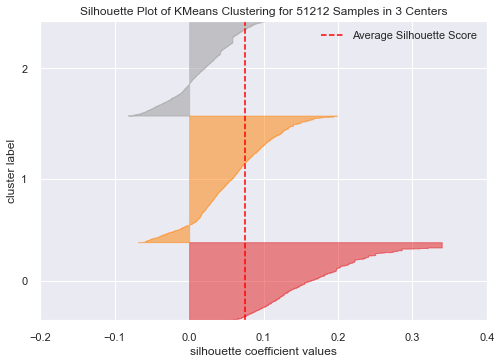

In [23]:
# silhouette analysis for optimal number of clusters
model = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    
visualizer.poof();   

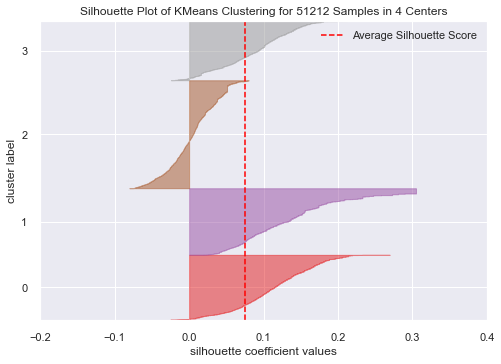

In [24]:
# silhouette analysis for optimal number of clusters
model = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    
visualizer.poof();   

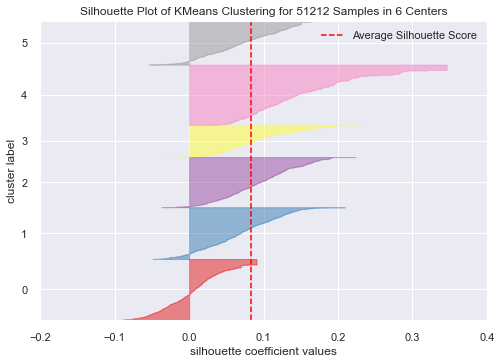

In [25]:
# silhouette analysis for optimal number of clusters
model = KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=300, random_state=0)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    
visualizer.poof();   

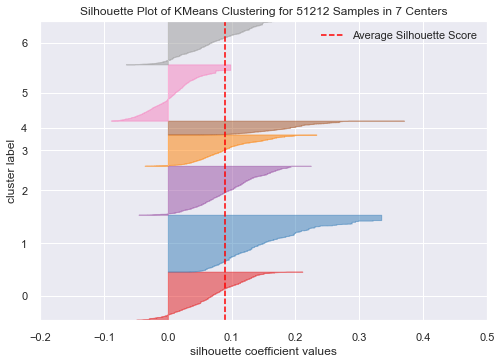

In [26]:
# silhouette analysis for optimal number of clusters
model = KMeans(n_clusters=7, init='k-means++', n_init=10, max_iter=300, random_state=0)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    
visualizer.poof();  

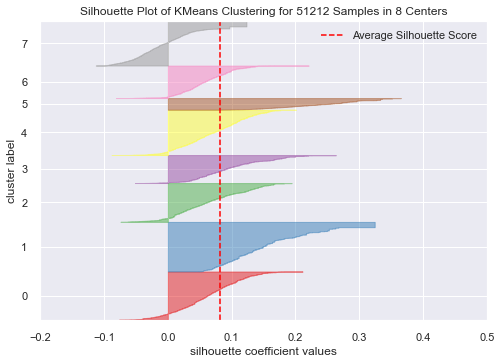

In [27]:
# silhouette analysis for optimal number of clusters
model = KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, random_state=0)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    
visualizer.poof();   

## 3. Four fragrance clusters

Typically, fragrances are categorized into four main families:
1. Floral;
2. Oriental;
3. Woody; 
4. Fresh.

In [28]:
# cluster fragrances
model4 = KMeans(n_clusters=4, init='k-means++', max_iter=200, n_init=10)
model4.fit(X)

KMeans(max_iter=200, n_clusters=4)

In [55]:
# print top terms per cluster
print('Top terms per cluster:')

order_centroids = model4.cluster_centers_.argsort()[:, ::-1]

terms = vectorizer.get_feature_names()

for i in range(0,4):
    print('Cluster %d:' % i, end='')
    for ind in order_centroids[i, :9]:
        print(' %s' % terms[ind], end='')
    print() 

Top terms per cluster:
Cluster 0: fresh aromatic spicy citrus green woody floral herbal balsamic
Cluster 1: fruity sweet powdery floral woody musky citrus rose vanilla
Cluster 2: warm spicy balsamic woody aromatic fresh amber patchouli powdery
Cluster 3: floral white citrus sweet woody fruity musky powdery green


Cluster 0 corresponds with the Fresh family <br>
Cluster 1 corresponds with the Woody family <br>
Cluster 2 corresponds with the Oriental family <br>
Cluster 3 corresponds with the Floral family <br>

In [58]:
# add a column with the cluster assignment
result2=result.copy()
result2['cluster4'] = model4.labels_
result2.head(10)

,brand,title,date,gender,rating_score,votes,accords_,cluster4
0,The-Spirit-of-Dubai,Aamal The Spirit of Dubai for women and men,2017,women,5.00,3,"woody,earthy,animalic,amber,musky",1
1,Ajmal,Aatifa Ajmal for women and men,2014,women,4.20,10,"fresh spicy,woody,musky,rose,amber",1
2,Al-Jazeera-Perfumes,AA Al-Jazeera Perfumes for women and men,0,women,0.00,0,"rose,woody,musky,oud,fruity",1
3,Art-of-Scent-Swiss-Perfumes,aarewasser Art of Scent - Swiss Perfumes for women and men,2010,women,0.00,1,"white floral,green,ozonic,fresh,animalic",3
4,Hamidi-Oud-Perfumes,Aaliyah Hamidi Oud & Perfumes for women and men,0,women,0.00,2,"woody,warm spicy,amber,balsamic,musky",2
5,Xyrena,Aaliyah Xyrena for women and men,2015,women,4.17,10,"powdery,fresh spicy,aromatic,woody,leather",0
6,Al-Jazeera-Perfumes,AAA Al-Jazeera Perfumes for women and men,0,women,4.75,4,"white floral,rose,oud,soft spicy,fresh spicy",2
7,source-adage-NYC,c’i'aan source adage NYC for women and men,2016,women,3.83,14,"woody,aromatic,fresh spicy,green,fresh",0
8,Blackbird,Targa Blackbird for women and men,2015,women,4.10,22,"balsamic,woody,smoky,fresh spicy,warm spicy",2
9,Blackbird,Broken Glass Blackbird for women and men,2015,women,3.71,18,"herbal,aromatic,musky,fresh spicy,warm spicy",2


In [61]:
# ordinal features mapping
cluster_mapping4 = {
    0: 'Fresh',
    1: 'Woody',
    2: 'Oriental',
    3: 'Floral'}

result2['cluster_name4'] = result2['cluster4'].map(cluster_mapping4)
result2.head(10)

,brand,title,date,gender,rating_score,votes,accords_,cluster4,cluster_name4
0,The-Spirit-of-Dubai,Aamal The Spirit of Dubai for women and men,2017,women,5.00,3,"woody,earthy,animalic,amber,musky",1,Woody
1,Ajmal,Aatifa Ajmal for women and men,2014,women,4.20,10,"fresh spicy,woody,musky,rose,amber",1,Woody
2,Al-Jazeera-Perfumes,AA Al-Jazeera Perfumes for women and men,0,women,0.00,0,"rose,woody,musky,oud,fruity",1,Woody
3,Art-of-Scent-Swiss-Perfumes,aarewasser Art of Scent - Swiss Perfumes for women and men,2010,women,0.00,1,"white floral,green,ozonic,fresh,animalic",3,Floral
4,Hamidi-Oud-Perfumes,Aaliyah Hamidi Oud & Perfumes for women and men,0,women,0.00,2,"woody,warm spicy,amber,balsamic,musky",2,Oriental
5,Xyrena,Aaliyah Xyrena for women and men,2015,women,4.17,10,"powdery,fresh spicy,aromatic,woody,leather",0,Fresh
6,Al-Jazeera-Perfumes,AAA Al-Jazeera Perfumes for women and men,0,women,4.75,4,"white floral,rose,oud,soft spicy,fresh spicy",2,Oriental
7,source-adage-NYC,c’i'aan source adage NYC for women and men,2016,women,3.83,14,"woody,aromatic,fresh spicy,green,fresh",0,Fresh
8,Blackbird,Targa Blackbird for women and men,2015,women,4.10,22,"balsamic,woody,smoky,fresh spicy,warm spicy",2,Oriental
9,Blackbird,Broken Glass Blackbird for women and men,2015,women,3.71,18,"herbal,aromatic,musky,fresh spicy,warm spicy",2,Oriental


In [60]:
# cluster count
result2['cluster_name4'].value_counts()

Woody       18747
Fresh       11661
Floral      11053
Oriental     9751
Name: cluster_name4, dtype: int64

## 4. Six fragrance clusters

There are six basic fragrance categories: 
1. Woody; 
2. Citrus; 
3. Floral; 
4. Fruity; 
5. Spicy/oriental;
6. Aquatic.

In [33]:
# cluster fragrances
model6 = KMeans(n_clusters=6, init='k-means++', max_iter=200, n_init=10)
model6.fit(X)

KMeans(max_iter=200, n_clusters=6)

In [63]:
# print top terms per cluster
print('Top terms per cluster:')

order_centroids = model6.cluster_centers_.argsort()[:, ::-1]

terms = vectorizer.get_feature_names()

for i in range(0,6):
    print('Cluster %d:' % i, end='')
    for ind in order_centroids[i, :9]:
        print(' %s' % terms[ind], end='')
    print() 

Top terms per cluster:
Cluster 0: fresh aromatic spicy citrus green woody floral herbal balsamic
Cluster 1: floral white citrus woody sweet musky green animalic rose
Cluster 2: powdery floral woody vanilla sweet musky balsamic citrus fruity
Cluster 3: fruity sweet floral citrus fresh woody tropical rose musky
Cluster 4: musky woody amber balsamic citrus rose green aromatic floral
Cluster 5: warm spicy balsamic woody aromatic fresh patchouli amber powdery


Cluster 0 corresponds with the Citrus family <br>
Cluster 1 corresponds with the Floral family <br>
Cluster 2 corresponds with the Aquatic family <br>
Cluster 3 corresponds with the Fruity family <br>
Cluster 4 corresponds with the Woody family <br>
Cluster 5 corresponds with the Spicy/Oriental family <br>

In [65]:
# add a column with the cluster assignment
result2['cluster6'] = model6.labels_
result2.head(10)

,brand,title,date,gender,rating_score,votes,accords_,cluster4,cluster_name4,cluster6
0,The-Spirit-of-Dubai,Aamal The Spirit of Dubai for women and men,2017,women,5.00,3,"woody,earthy,animalic,amber,musky",1,Woody,4
1,Ajmal,Aatifa Ajmal for women and men,2014,women,4.20,10,"fresh spicy,woody,musky,rose,amber",1,Woody,4
2,Al-Jazeera-Perfumes,AA Al-Jazeera Perfumes for women and men,0,women,0.00,0,"rose,woody,musky,oud,fruity",1,Woody,4
3,Art-of-Scent-Swiss-Perfumes,aarewasser Art of Scent - Swiss Perfumes for women and men,2010,women,0.00,1,"white floral,green,ozonic,fresh,animalic",3,Floral,1
4,Hamidi-Oud-Perfumes,Aaliyah Hamidi Oud & Perfumes for women and men,0,women,0.00,2,"woody,warm spicy,amber,balsamic,musky",2,Oriental,5
5,Xyrena,Aaliyah Xyrena for women and men,2015,women,4.17,10,"powdery,fresh spicy,aromatic,woody,leather",0,Fresh,0
6,Al-Jazeera-Perfumes,AAA Al-Jazeera Perfumes for women and men,0,women,4.75,4,"white floral,rose,oud,soft spicy,fresh spicy",2,Oriental,1
7,source-adage-NYC,c’i'aan source adage NYC for women and men,2016,women,3.83,14,"woody,aromatic,fresh spicy,green,fresh",0,Fresh,0
8,Blackbird,Targa Blackbird for women and men,2015,women,4.10,22,"balsamic,woody,smoky,fresh spicy,warm spicy",2,Oriental,5
9,Blackbird,Broken Glass Blackbird for women and men,2015,women,3.71,18,"herbal,aromatic,musky,fresh spicy,warm spicy",2,Oriental,5


In [66]:
# ordinal features mapping
cluster_mapping6 = {
    0: 'Citrus',
    1: 'Floral',
    2: 'Aquatic',
    3: 'Fruity',
    4: 'Woody',
    5: 'Spicy/Oriental'}

result2['cluster_name6'] = result2['cluster6'].map(cluster_mapping6)
result2.head()

,brand,title,date,gender,rating_score,votes,accords_,cluster4,cluster_name4,cluster6,cluster_name6
0,The-Spirit-of-Dubai,Aamal The Spirit of Dubai for women and men,2017,women,5.0,3,"woody,earthy,animalic,amber,musky",1,Woody,4,Woody
1,Ajmal,Aatifa Ajmal for women and men,2014,women,4.2,10,"fresh spicy,woody,musky,rose,amber",1,Woody,4,Woody
2,Al-Jazeera-Perfumes,AA Al-Jazeera Perfumes for women and men,0,women,0.0,0,"rose,woody,musky,oud,fruity",1,Woody,4,Woody
3,Art-of-Scent-Swiss-Perfumes,aarewasser Art of Scent - Swiss Perfumes for women and men,2010,women,0.0,1,"white floral,green,ozonic,fresh,animalic",3,Floral,1,Floral
4,Hamidi-Oud-Perfumes,Aaliyah Hamidi Oud & Perfumes for women and men,0,women,0.0,2,"woody,warm spicy,amber,balsamic,musky",2,Oriental,5,Spicy/Oriental


In [37]:
# cluster count
result2['cluster_name6'].value_counts()

Fruity            10137
Aquatic            9102
Citrus             9004
Woody              8716
Floral             7546
Spicy/Oriental     6707
Name: cluster_name6, dtype: int64

## 5. Seven fragrance clusters

Seven basic fragrance categories: 
1. Gourmand;
2. Fruity;
3. Citrus;
4. Floral;
5. Spicy;
6. Aquatic;
7. Amber;

In [38]:
# cluster fragrances
model7 = KMeans(n_clusters=7, init='k-means++', max_iter=200, n_init=10)
model7.fit(X)

KMeans(max_iter=200, n_clusters=7)

In [67]:
# print top terms per cluster
print('Top terms per cluster:')

order_centroids = model7.cluster_centers_.argsort()[:, ::-1]

terms = vectorizer.get_feature_names()

for i in range(0,7):
    print('Cluster %d:' % i, end='')
    for ind in order_centroids[i, :8]:
        print(' %s' % terms[ind], end='')
    print() 

Top terms per cluster:
Cluster 0: balsamic warm spicy amber woody musky patchouli smoky
Cluster 1: floral white citrus woody sweet musky rose animalic
Cluster 2: fruity sweet floral citrus woody vanilla fresh tropical
Cluster 3: spicy fresh aromatic woody citrus warm balsamic floral
Cluster 4: aquatic ozonic floral fresh fruity green citrus woody
Cluster 5: powdery woody floral balsamic vanilla musky citrus spicy
Cluster 6: green aromatic fresh citrus spicy woody floral earthy


Cluster 0 corresponds with the Amber family <br>
Cluster 1 corresponds with the Floral family <br>
Cluster 2 corresponds with the Fruity family <br>
Cluster 3 corresponds with the Spicy family <br>
Cluster 4 corresponds with the Aquatic family <br>
Cluster 5 corresponds with the Gourmand family <br>
Cluster 6 corresponds with the Citrus family

In [71]:
# add a column with the cluster assignment
result2['cluster7'] = model7.labels_
result2.head()

,brand,title,date,gender,rating_score,votes,accords_,cluster4,cluster_name4,cluster6,cluster_name6,cluster7,cluster_name7
0,The-Spirit-of-Dubai,Aamal The Spirit of Dubai for women and men,2017,women,5.0,3,"woody,earthy,animalic,amber,musky",1,Woody,4,Woody,0,Amber
1,Ajmal,Aatifa Ajmal for women and men,2014,women,4.2,10,"fresh spicy,woody,musky,rose,amber",1,Woody,4,Woody,0,Amber
2,Al-Jazeera-Perfumes,AA Al-Jazeera Perfumes for women and men,0,women,0.0,0,"rose,woody,musky,oud,fruity",1,Woody,4,Woody,2,Gourmand
3,Art-of-Scent-Swiss-Perfumes,aarewasser Art of Scent - Swiss Perfumes for women and men,2010,women,0.0,1,"white floral,green,ozonic,fresh,animalic",3,Floral,1,Floral,1,Fruity
4,Hamidi-Oud-Perfumes,Aaliyah Hamidi Oud & Perfumes for women and men,0,women,0.0,2,"woody,warm spicy,amber,balsamic,musky",2,Oriental,5,Spicy/Oriental,0,Amber


In [72]:
# ordinal features mapping
cluster_mapping7 = {
    0: 'Amber',
    1: 'Floral',
    2: 'Fruity',
    3: 'Spicy',
    4: 'Aquatic',
    5: 'Gourmand',
    6: 'Citrus'}

result2['cluster_name7'] = result2['cluster7'].map(cluster_mapping7)
result2.head()

,brand,title,date,gender,rating_score,votes,accords_,cluster4,cluster_name4,cluster6,cluster_name6,cluster7,cluster_name7
0,The-Spirit-of-Dubai,Aamal The Spirit of Dubai for women and men,2017,women,5.0,3,"woody,earthy,animalic,amber,musky",1,Woody,4,Woody,0,Amber
1,Ajmal,Aatifa Ajmal for women and men,2014,women,4.2,10,"fresh spicy,woody,musky,rose,amber",1,Woody,4,Woody,0,Amber
2,Al-Jazeera-Perfumes,AA Al-Jazeera Perfumes for women and men,0,women,0.0,0,"rose,woody,musky,oud,fruity",1,Woody,4,Woody,2,Fruity
3,Art-of-Scent-Swiss-Perfumes,aarewasser Art of Scent - Swiss Perfumes for women and men,2010,women,0.0,1,"white floral,green,ozonic,fresh,animalic",3,Floral,1,Floral,1,Floral
4,Hamidi-Oud-Perfumes,Aaliyah Hamidi Oud & Perfumes for women and men,0,women,0.0,2,"woody,warm spicy,amber,balsamic,musky",2,Oriental,5,Spicy/Oriental,0,Amber


In [73]:
# cluster count
result2['cluster_name7'].value_counts()

Amber       10861
Floral       9265
Spicy        8474
Fruity       7862
Gourmand     6658
Citrus       6116
Aquatic      1976
Name: cluster_name7, dtype: int64

## 6. Eight fragrance clusters

Different types of fragrances:
1. Floral;
2. Citrus;
3. Woody;
4. Oriental;
5. Fruity;
6. Green;
7. Oceanic;
8. Spicy.

In [43]:
# cluster fragrances
model8 = KMeans(n_clusters=8, init='k-means++', max_iter=200, n_init=10)
model8.fit(X)

KMeans(max_iter=200)

In [74]:
# print top terms per cluster
print('Top terms per cluster:')

order_centroids = model8.cluster_centers_.argsort()[:, ::-1]

terms = vectorizer.get_feature_names()

for i in range(0,8):
    print('Cluster %d:' % i, end='')
    for ind in order_centroids[i, :9]:
        print(' %s' % terms[ind], end='')
    print() 

Top terms per cluster:
Cluster 0: rose floral citrus fruity woody musky powdery white fresh
Cluster 1: powdery floral woody vanilla sweet balsamic musky citrus fruity
Cluster 2: warm spicy balsamic woody aromatic fresh patchouli amber powdery
Cluster 3: balsamic amber woody musky leather smoky pictures aromatic animalic
Cluster 4: aquatic ozonic floral fresh fruity green citrus woody white
Cluster 5: fruity sweet floral citrus woody tropical fresh vanilla sour
Cluster 6: fresh aromatic spicy citrus green woody floral herbal balsamic
Cluster 7: floral white citrus woody sweet animalic musky green tuberose


Cluster 0 corresponds with the Floral family <br>
Cluster 1 corresponds with the Woody family <br>
Cluster 2 corresponds with the Spicy family <br>
Cluster 3 corresponds with the Oriental family <br>
Cluster 4 corresponds with the Oceanic family <br>
Cluster 5 corresponds with the Fruity family <br>
Cluster 6 corresponds with the Green family <br>
Cluster 7 corresponds with the Citrus family

In [75]:
# add a column with the cluster assignment
result2['cluster8'] = model8.labels_
result2.head()

,brand,title,date,gender,rating_score,votes,accords_,cluster4,cluster_name4,cluster6,cluster_name6,cluster7,cluster_name7,cluster8
0,The-Spirit-of-Dubai,Aamal The Spirit of Dubai for women and men,2017,women,5.0,3,"woody,earthy,animalic,amber,musky",1,Woody,4,Woody,0,Amber,3
1,Ajmal,Aatifa Ajmal for women and men,2014,women,4.2,10,"fresh spicy,woody,musky,rose,amber",1,Woody,4,Woody,0,Amber,0
2,Al-Jazeera-Perfumes,AA Al-Jazeera Perfumes for women and men,0,women,0.0,0,"rose,woody,musky,oud,fruity",1,Woody,4,Woody,2,Fruity,0
3,Art-of-Scent-Swiss-Perfumes,aarewasser Art of Scent - Swiss Perfumes for women and men,2010,women,0.0,1,"white floral,green,ozonic,fresh,animalic",3,Floral,1,Floral,1,Floral,7
4,Hamidi-Oud-Perfumes,Aaliyah Hamidi Oud & Perfumes for women and men,0,women,0.0,2,"woody,warm spicy,amber,balsamic,musky",2,Oriental,5,Spicy/Oriental,0,Amber,2


In [76]:
# ordinal features mapping
cluster_mapping8 = {
    0: 'Floral',
    1: 'Woody',
    2: 'Spicy',
    3: 'Oriental',
    4: 'Oceanic',
    5: 'Fruity',
    6: 'Green',
    7: 'Citrus'}

result2['cluster_name8'] = result2['cluster8'].map(cluster_mapping8)
result2.head()

,brand,title,date,gender,rating_score,votes,accords_,cluster4,cluster_name4,cluster6,cluster_name6,cluster7,cluster_name7,cluster8,cluster_name8
0,The-Spirit-of-Dubai,Aamal The Spirit of Dubai for women and men,2017,women,5.0,3,"woody,earthy,animalic,amber,musky",1,Woody,4,Woody,0,Amber,3,Oriental
1,Ajmal,Aatifa Ajmal for women and men,2014,women,4.2,10,"fresh spicy,woody,musky,rose,amber",1,Woody,4,Woody,0,Amber,0,Floral
2,Al-Jazeera-Perfumes,AA Al-Jazeera Perfumes for women and men,0,women,0.0,0,"rose,woody,musky,oud,fruity",1,Woody,4,Woody,2,Fruity,0,Floral
3,Art-of-Scent-Swiss-Perfumes,aarewasser Art of Scent - Swiss Perfumes for women and men,2010,women,0.0,1,"white floral,green,ozonic,fresh,animalic",3,Floral,1,Floral,1,Floral,7,Citrus
4,Hamidi-Oud-Perfumes,Aaliyah Hamidi Oud & Perfumes for women and men,0,women,0.0,2,"woody,warm spicy,amber,balsamic,musky",2,Oriental,5,Spicy/Oriental,0,Amber,2,Spicy


In [47]:
# cluster count
result2['cluster_name8'].value_counts()

Spicy       9587
Fruity      8580
Green       7603
Floral      6802
Oriental    5939
Oceanic     5555
Woody       5152
Citrus      1994
Name: cluster_name8, dtype: int64

The floral fragrance family 
- Fruity: Sweet, edible and tropical like peach, pear and apple.
- Floral: Smells like fresh-cut flowers — imagine rose and lily.
- Soft floral: Soft, powdery and sweet with a hint of creamy.
- Floral oriental: Florals with subtle spice notes.

The oriental fragrance family
- Soft oriental: Soft, floral notes mix with incense and warm spices.
- Oriental: Sweet, warm notes like cinnamon, vanilla and musk.
- Woody oriental: Earthy notes like patchouli and sandalwood mixed with spicy and sweet notes.

The woody fragrance family:
- Woods: Aromatic scents like cedarwood, sandalwood and vetiver.
- Mossy woods: Sweet, smooth and earthy scents like oakmoss and amber.
- Dry woods: Smouldering and smoky mixed with leather aromas.

The fresh fragrance family:
- Aromatic: Clean and fresh herbs mixed with lavender or woody scents.
- Citrus: Zesty or tangy notes like mandarins or bergamot.
- Water: Aquatic scents that smell of sea spray or rain mixed with or oceanic notes.
- Green: Smells of freshly mowed lawns and crushed green leaves.

In [84]:
result2.loc[result2['brand']=='Chanel'].head()

,brand,title,date,gender,rating_score,votes,accords_,cluster4,cluster_name4,cluster6,cluster_name6,cluster7,cluster_name7,cluster8,cluster_name8
1881,Chanel,Chance Parfum Chanel for women,2003,women,4.05,92,"powdery,white floral,vanilla,musky,floral",3,Floral,1,Floral,1,Floral,1,Woody
3620,Chanel,Chance Eau Tendre Chanel for women,2010,women,4.10,5299,"floral,fruity,citrus,sweet,fresh spicy",1,Woody,3,Fruity,2,Fruity,5,Fruity
3623,Chanel,Chance Eau de Toilette Chanel for women,2003,women,3.79,5351,"patchouli,green,citrus,sweet,earthy",1,Woody,4,Woody,0,Amber,3,Oriental
3635,Chanel,Chanel N°5 Eau Premiere Chanel for women,2007,women,4.11,2859,"woody,aldehydic,white floral,yellow floral,vanilla",3,Floral,1,Floral,1,Floral,7,Citrus
3642,Chanel,Allure Homme Edition Blanche Chanel for men,2008,NaN,4.41,3592,"citrus,aromatic,woody,green,vanilla",0,Fresh,0,Citrus,6,Citrus,6,Green


In [85]:
result2.sort_values('votes', ascending=False).head(20)

,brand,title,date,gender,rating_score,votes,accords_,cluster4,cluster_name4,cluster6,cluster_name6,cluster7,cluster_name7,cluster8,cluster_name8
9762,Mugler,Angel Mugler for women,1992,women,3.15,11188,"sweet,patchouli,warm spicy,fruity,caramel",2,Oriental,5,Spicy/Oriental,2,Fruity,2,Spicy
8141,Mugler,Alien Mugler for women,2005,women,3.81,10435,"white floral,amber,woody,animalic,balsamic",3,Floral,1,Floral,1,Floral,7,Citrus
26082,Chanel,Coco Mademoiselle Chanel for women,2001,women,4.08,10349,"citrus,patchouli,white floral,sweet,rose",3,Floral,1,Floral,1,Floral,0,Floral
20025,Dolce-Gabbana,Light Blue Dolce&Gabbana for women,2001,women,3.64,10008,"citrus,woody,green,fresh,fruity",0,Fresh,3,Fruity,6,Citrus,5,Fruity
43773,Christian-Dior,Hypnotic Poison Christian Dior for women,1998,women,3.95,9771,"vanilla,almond,sweet,nutty,fruity",1,Woody,3,Fruity,2,Fruity,5,Fruity
37519,Yves-Saint-Laurent,La Nuit de l'Homme Yves Saint Laurent for men,2009,NaN,4.45,8738,"aromatic,warm spicy,fresh spicy,woody,floral",2,Oriental,5,Spicy/Oriental,3,Spicy,2,Spicy
3108,Christian-Dior,J'adore Christian Dior for women,1999,women,3.64,8689,"floral,fruity,white floral,sweet,aquatic",3,Floral,1,Floral,4,Aquatic,4,Oceanic
4939,Viktor-Rolf,Flowerbomb Viktor&Rolf for women,2005,women,3.72,8573,"floral,patchouli,white floral,green,citrus",3,Floral,1,Floral,1,Floral,7,Citrus
37269,Calvin-Klein,Euphoria Calvin Klein for women,2005,women,3.68,8161,"woody,floral,powdery,sweet,amber",1,Woody,2,Aquatic,5,Gourmand,1,Woody
15091,Tom-Ford,Black Orchid Tom Ford for women,1,women,3.77,8128,"warm spicy,sweet,earthy,balsamic,cacao",2,Oriental,5,Spicy/Oriental,0,Amber,2,Spicy


## 7. Hierarchical clustering